#### Importing libraires and dataset

In [1]:
#for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# importing dataset
from sklearn.datasets import load_breast_cancer

In [2]:
# reading the dataset into pandas table
df = load_breast_cancer()

In [3]:
df = pd.DataFrame(np.c_[df['data'],df['target']],columns = np.append(df['feature_names'],['target']))

In [4]:
df.head().transpose()

0            1            2           3  \
mean radius                17.990000    20.570000    19.690000   11.420000   
mean texture               10.380000    17.770000    21.250000   20.380000   
mean perimeter            122.800000   132.900000   130.000000   77.580000   
mean area                1001.000000  1326.000000  1203.000000  386.100000   
mean smoothness             0.118400     0.084740     0.109600    0.142500   
mean compactness            0.277600     0.078640     0.159900    0.283900   
mean concavity              0.300100     0.086900     0.197400    0.241400   
mean concave points         0.147100     0.070170     0.127900    0.105200   
mean symmetry               0.241900     0.181200     0.206900    0.259700   
mean fractal dimension      0.078710     0.056670     0.059990    0.097440   
radius error                1.095000     0.543500     0.745600    0.495600   
texture error               0.905300     0.733900     0.786900    1.156000   
perimeter error             8.589000     3.398000     4.585000    3.445000   
area error                153.400000    74.080000    94.030000   27.230000   
smoothness error            0.006399     0.005225     0.006150    0.009110   
compactness error           0.049040     0.013080     0.040060    0.074580   
concavity error             0.053730     0.018600     0.038320    0.056610   
concave points error        0.015870     0.013400     0.020580    0.018670   
symmetry error              0.030030     0.013890     0.022500    0.059630   
fractal dimension error     0.006193     0.003532     0.004571    0.009208   
worst radius               25.380000    24.990000    23.570000   14.910000   
worst texture              17.330000    23.410000    25.530000   26.500000   
worst perimeter           184.600000   158.800000   152.500000   98.870000   
worst area               2019.000000  1956.000000  1709.000000  567.700000   
worst smoothness            0.162200     0.123800     0.144400    0.209800   
worst compactness           0.665600     0.186600     0.424500    0.866300   
worst concavity             0.711900     0.241600     0.450400    0.686900   
worst concave points        0.265400     0.186000     0.243000    0.257500   
worst symmetry              0.460100     0.275000     0.361300    0.663800   
worst fractal dimension     0.118900     0.089020     0.087580    0.173000   
target                      0.000000     0.000000     0.000000    0.000000   

                                   4  
mean radius                20.290000  
mean texture               14.340000  
mean perimeter            135.100000  
mean area                1297.000000  
mean smoothness             0.100300  
mean compactness            0.132800  
mean concavity              0.198000  
mean concave points         0.104300  
mean symmetry               0.180900  
mean fractal dimension      0.058830  
radius error                0.757200  
texture error               0.781300  
perimeter error             5.438000  
area error                 94.440000  
smoothness error            0.011490  
compactness error           0.024610  
concavity error             0.056880  
concave points error        0.018850  
symmetry error              0.017560  
fractal dimension error     0.005115  
worst radius               22.540000  
worst texture              16.670000  
worst perimeter           152.200000  
worst area               1575.000000  
worst smoothness            0.137400  
worst compactness           0.205000  
worst concavity             0.400000  
worst concave points        0.162500  
worst symmetry              0.236400  
worst fractal dimension     0.076780  
target                      0.000000

#### EDA and Data Preprocessing

In [5]:
#splitting into target and predictors
x = df.drop('target',axis=1)
y = df[['target']]

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

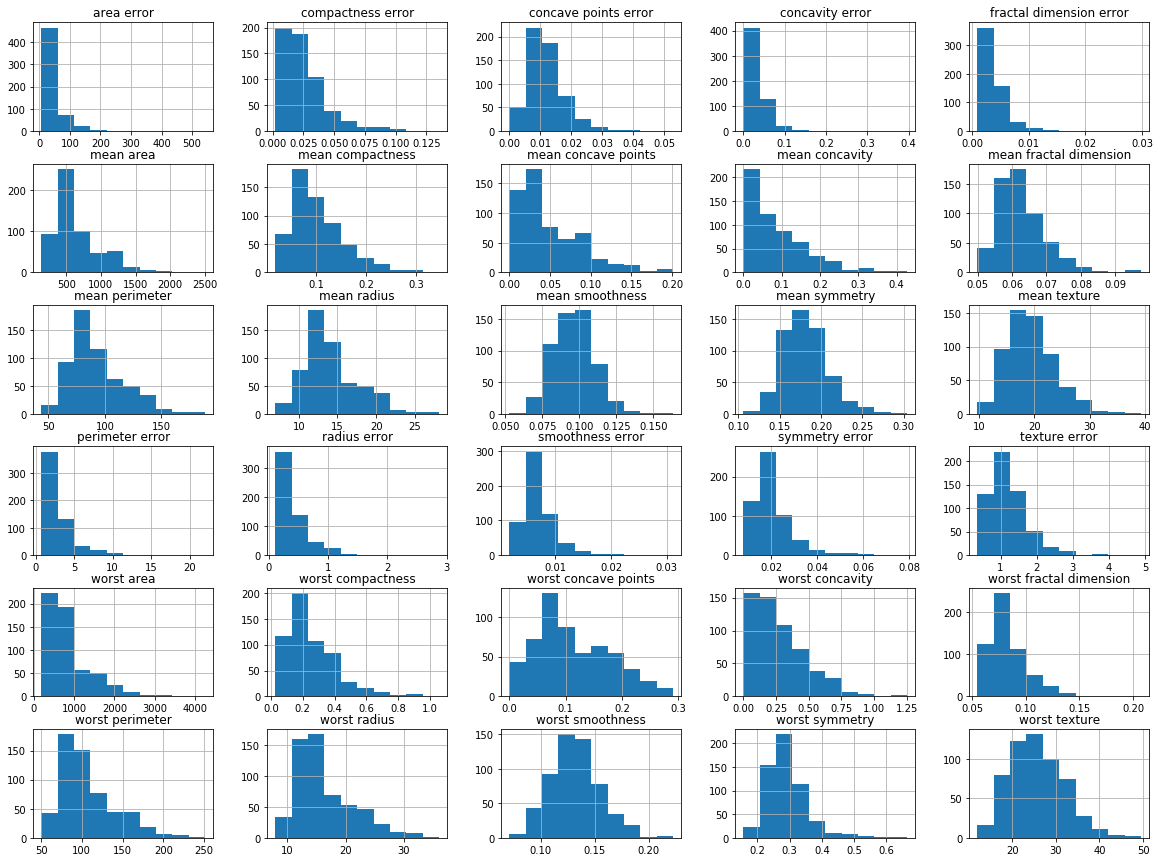

In [7]:
x.hist(figsize=(20,15))
plt.show()

In [8]:
x.skew()

mean radius                0.942380
mean texture               0.650450
mean perimeter             0.990650
mean area                  1.645732
mean smoothness            0.456324
mean compactness           1.190123
mean concavity             1.401180
mean concave points        1.171180
mean symmetry              0.725609
mean fractal dimension     1.304489
radius error               3.088612
texture error              1.646444
perimeter error            3.443615
area error                 5.447186
smoothness error           2.314450
compactness error          1.902221
concavity error            5.110463
concave points error       1.444678
symmetry error             2.195133
fractal dimension error    3.923969
worst radius               1.103115
worst texture              0.498321
worst perimeter            1.128164
worst area                 1.859373
worst smoothness           0.415426
worst compactness          1.473555
worst concavity            1.150237
worst concave points       0

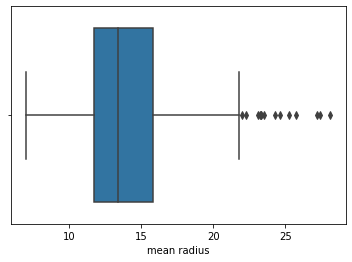

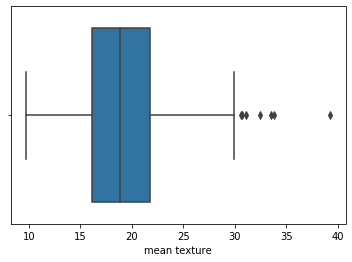

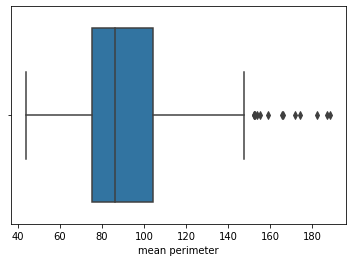

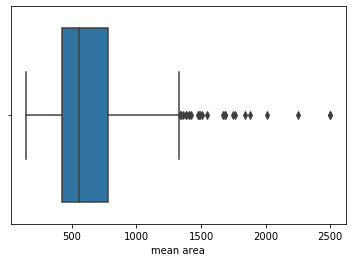

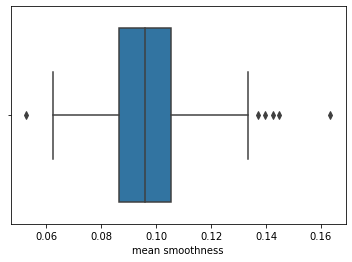

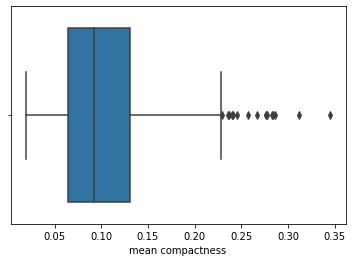

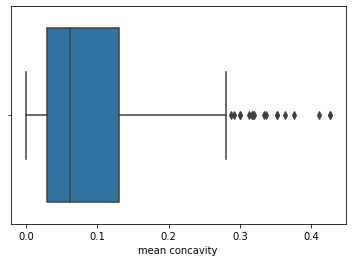

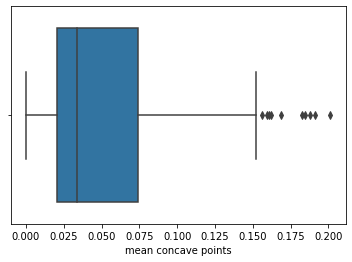

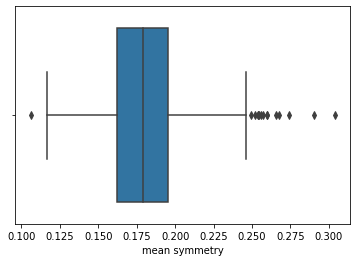

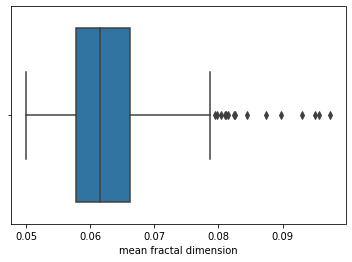

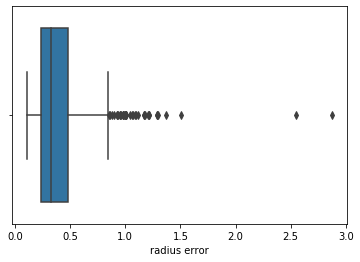

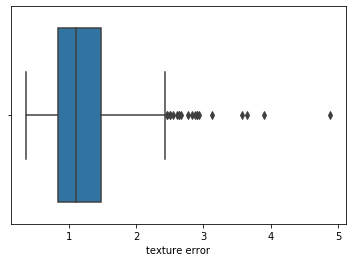

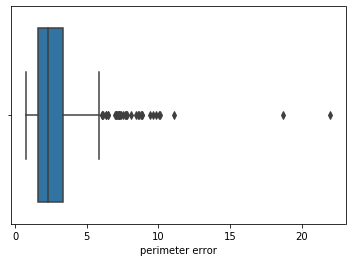

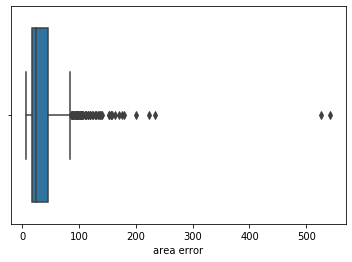

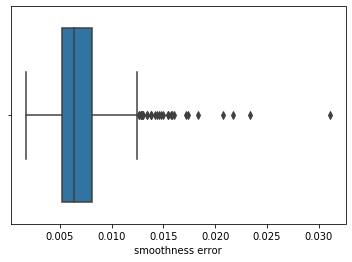

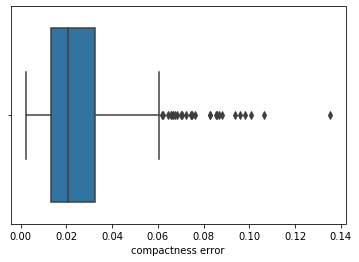

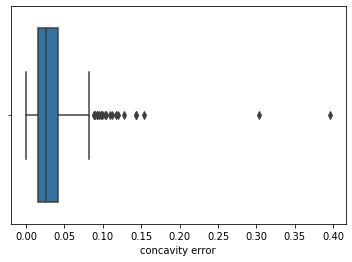

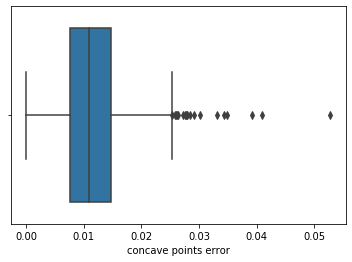

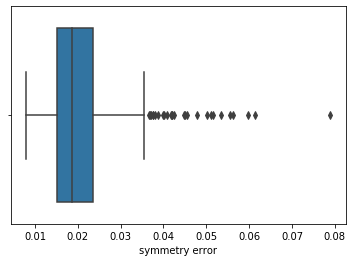

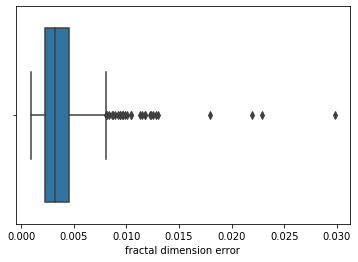

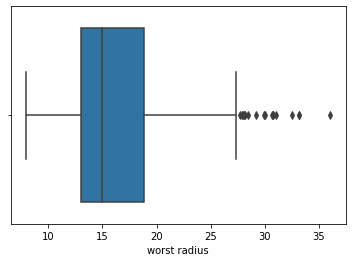

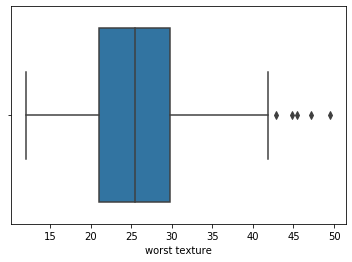

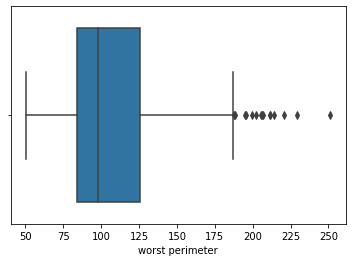

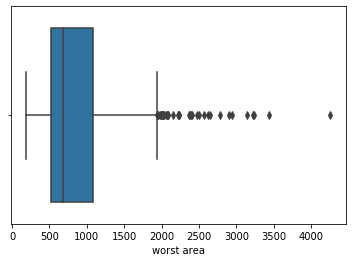

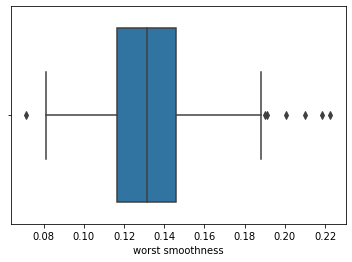

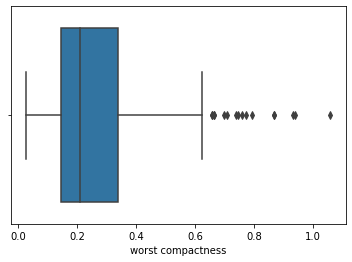

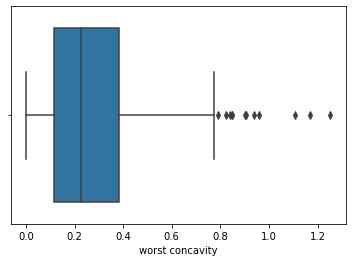

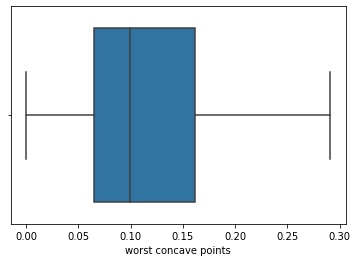

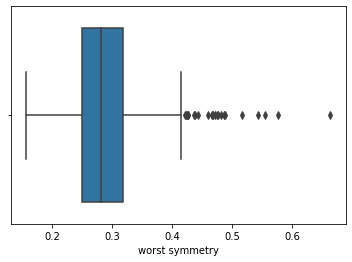

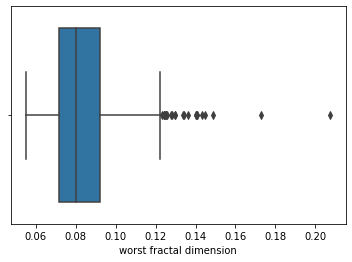

In [9]:
for i,val in x.iteritems():
    sns.boxplot(x[i])
    plt.show()

In [10]:
#func to remove outliers
def rm_out(df):
    for i,val in df.iteritems():
        u_thres = df[i].quantile(q=0.75)+1.5*(df[i].quantile(q=0.75)-df[i].quantile(q=0.25))
        l_thres = df[i].quantile(q=0.25)-1.5*(df[i].quantile(q=0.75)-df[i].quantile(q=0.25))
        df[i] = df[(df[i]>=l_thres) & (df[i]<=u_thres)][i]

In [11]:
x1 = x.copy()

In [12]:
rm_out(x1)

In [13]:
for (colname, colvalues) in x1.iteritems():
    if x1[colname].isnull().sum() > (.3*x1.shape[0]):
        x1.drop([colname],inplace=True,axis=1)
    else:
        x1[colname].fillna(x1[colname].mean(),inplace=True)

In [14]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [15]:
skew1 = x1.skew()
skew1 = skew1[skew1>0.5]
skew1

mean radius                0.613484
mean perimeter             0.649713
mean area                  0.982883
mean compactness           0.742204
mean concavity             0.940165
mean concave points        0.930899
mean fractal dimension     0.571232
radius error               1.091669
texture error              0.557328
perimeter error            1.022404
area error                 1.513120
smoothness error           0.603221
compactness error          0.900228
concavity error            0.791277
symmetry error             0.757530
fractal dimension error    0.861146
worst radius               0.803317
worst perimeter            0.823491
worst area                 1.145672
worst compactness          0.812607
worst concavity            0.729665
worst fractal dimension    0.684054
dtype: float64

In [16]:
x1[skew1.index.values] = np.log1p(x1[skew1.index.values])

In [17]:
x1.skew()

mean radius                0.147784
mean texture               0.361728
mean perimeter             0.134420
mean area                  0.023963
mean smoothness            0.191731
mean compactness           0.655802
mean concavity             0.840682
mean concave points        0.870799
mean symmetry              0.250434
mean fractal dimension     0.557498
radius error               0.837733
texture error              0.116297
perimeter error            0.378194
area error                 0.312288
smoothness error           0.598356
compactness error          0.873392
concavity error            0.748069
concave points error       0.316263
symmetry error             0.744768
fractal dimension error    0.857638
worst radius               0.329338
worst texture              0.290058
worst perimeter            0.296471
worst area                 0.177425
worst smoothness           0.181761
worst compactness          0.595820
worst concavity            0.467161
worst concave points       0

In [18]:
#transforming using standard scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [19]:
x1 = sc.fit_transform(x1)

In [20]:
x = pd.DataFrame(x)
x1 = pd.DataFrame(x1)

In [21]:
x.head()

0         1         2         3         4         5         6   \
0  1.097064 -2.073335  1.269934  0.984375  1.568466  3.283515  2.652874   
1  1.829821 -0.353632  1.685955  1.908708 -0.826962 -0.487072 -0.023846   
2  1.579888  0.456187  1.566503  1.558884  0.942210  1.052926  1.363478   
3 -0.768909  0.253732 -0.592687 -0.764464  3.283553  3.402909  1.915897   
4  1.750297 -1.151816  1.776573  1.826229  0.280372  0.539340  1.371011   

         7         8         9   ...        20        21        22        23  \
0  2.532475  2.217515  2.255747  ...  1.886690 -1.359293  2.303601  2.001237   
1  0.548144  0.001392 -0.868652  ...  1.805927 -0.369203  1.535126  1.890489   
2  2.037231  0.939685 -0.398008  ...  1.511870 -0.023974  1.347475  1.456285   
3  1.451707  2.867383  4.910919  ... -0.281464  0.133984 -0.249939 -0.550021   
4  1.428493 -0.009560 -0.562450  ...  1.298575 -1.466770  1.338539  1.220724   

         24        25        26        27        28        29  
0  1.307686  2.616665  2.109526  2.296076  2.750622  1.937015  
1 -0.375612 -0.430444 -0.146749  1.087084 -0.243890  0.281190  
2  0.527407  1.082932  0.854974  1.955000  1.152255  0.201391  
3  3.394275  3.893397  1.989588  2.175786  6.046041  4.935010  
4  0.220556 -0.313395  0.613179  0.729259 -0.868353 -0.397100  

[5 rows x 30 columns]

In [22]:
x1.head()

0         1         2         3             4         5         6   \
0  1.302537 -2.184463  1.446502  1.380707  1.707947e+00  0.020140  0.029748   
1  1.926560 -0.336962  1.788462  2.040098 -8.587252e-01 -0.461664  0.129820   
2  1.722523  0.533039  1.692989  1.811779  1.036921e+00  1.357228  1.783700   
3 -0.777382  0.315539 -0.535472 -0.851678 -7.407549e-15  0.020140  2.400124   
4  1.862556 -1.194463  1.859520  1.988233  3.277695e-01  0.765194  1.792257   

         7             8         9   ...        20        21        22  \
0  2.810292  2.646195e+00  2.819836  ...  2.027956 -1.400300  2.276501   
1  0.693886  8.439340e-02 -0.943070  ...  1.964687 -0.357893  1.708828   
2  2.295683  1.169044e+00 -0.371251  ...  1.726016  0.005578  1.556271   
3  1.675842  4.685620e-15  0.002746  ... -0.120025  0.171883 -0.073999   
4  1.651005  7.173210e-02 -0.570839  ...  1.544100 -1.513456  1.548852   

         23            24        25        26        27            28  \
0  0.237112  1.429279e+00  0.050882  2.272691  2.296076  1.192235e-15   
1  0.237112 -3.700661e-01 -0.381831 -0.020011  1.087084 -1.519585e-01   
2  1.924296  5.952077e-01  1.448864  1.089487  1.955000  1.701541e+00   
3 -0.440632  6.502847e-15  0.050882  2.167683  2.175786  1.192235e-15   
4  1.748997  2.672020e-01 -0.227669  0.837042  0.729259 -9.809860e-01   

         29  
0  2.706266  
1  0.551001  
2  0.445644  
3  0.006297  
4 -0.349004  

[5 rows x 30 columns]

#### Making a model for Non Treated Values

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 1)

In [24]:
#from imblearn.over_sampling import SMOTE 
#sm = SMOTE(random_state = 2) 
#X_train, y_train = sm.fit_sample(X_train, y_train)

In [25]:
type(y_train)

pandas.core.frame.DataFrame

In [26]:
from sklearn.svm import SVC
classifier = SVC()

In [27]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

C:\Users\No_ob0dy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\No_ob0dy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
grid_search.best_score_

0.9798994974874372

In [29]:
grid_search.best_params_

{'C': 1, 'kernel': 'linear'}

In [30]:
model1 = SVC(C=1,kernel='linear')
model1.fit(X_train,y_train)

C:\Users\No_ob0dy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [31]:
y_pred1 = model1.predict(X_test)

In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
cm

array([[ 60,   3],
       [  5, 103]], dtype=int64)

In [33]:
from sklearn.metrics import accuracy_score,recall_score
print("Accuracy is :",accuracy_score(y_test,y_pred1))
print("Recall is :",recall_score(y_test,y_pred1))

Accuracy is : 0.9532163742690059
Recall is : 0.9537037037037037


#### Model with treated values

In [34]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x1, y, test_size = 0.30, random_state = 1)
#X_train1, y_train1 = sm.fit_sample(X_train1, y_train1)

In [35]:
classifier = SVC()
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train1, y_train1)

C:\Users\No_ob0dy\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\No_ob0dy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [36]:
grid_search.best_score_

0.9698492462311558

In [37]:
grid_search.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [38]:
model2 = SVC(C=1,kernel='rbf',gamma=0.1)
model2.fit(X_train1,y_train1)

C:\Users\No_ob0dy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
y_pred2 = model2.predict(X_test1)

In [40]:
cm1 = confusion_matrix(y_test1, y_pred2)
cm1

array([[ 57,   6],
       [  2, 106]], dtype=int64)

In [41]:
print("Accuracy is :",accuracy_score(y_test1,y_pred2))
print("Recall is :",recall_score(y_test1,y_pred2))

Accuracy is : 0.9532163742690059
Recall is : 0.9814814814814815
